# Final Exam

**Name:** Orhun   
**Surname:** Görkem  
**Id:**2017400171


## Question 1

### a)


In [1]:
import numpy as np
from scipy.linalg import null_space
import scipy as sp
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
def verify(A,B,C):
    X = np.linalg.pinv(A)@C   #possible x columns to give coefficients to generate C columns from A subspace
    Y = np.linalg.pinv(B)@C   #possible y columns to give coefficients to generate C columns from B subspace
    sum = 0
    sum += round(np.linalg.norm(A@X-C),5)
    sum += round(np.linalg.norm(B@Y-C),5)
    return sum<0.00001

### b)


Let $A$ and $B$ be matrixes. Let $U$ and $V$ be matrices whose columns are the basis vectors of $A$ and $B$ respectively. Then some vector $z$ is in the intersection subspace of $A$ and $B$ if and only if there is some nonzero $x$ and $y$ such that 

$$ U.x = V.y = z$$

To yield $z$, we need to find the $x$ and $y$.

The nullspace of augmented matrix $M$ yields $x$ and $y$.

$$
M = \begin{bmatrix}
U | -V
\end{bmatrix}
$$  

$$
\begin{bmatrix}
U | -V
\end{bmatrix}. \begin{bmatrix} x\\ y \end{bmatrix} = 0
$$

In [3]:
def intersection(A,B):
    Q1,R1 = np.linalg.qr(A)
    Q2,R2 = np.linalg.qr(B) 
  
    rank1 = np.linalg.matrix_rank(A)
    rank2 = np.linalg.matrix_rank(B)
    Q1 = Q1[:,0:rank1]  
    Q2 = Q2[:,0:rank2]
    M = np.hstack((Q1,-1*Q2))
    v = null_space(M)
    n = Q1.shape[1]
    x_i = v[0:n]
    return Q1@x_i 

### c)

In [4]:
A1 = np.load('./data/Q1_A1.npy')
B1 = np.load('./data/Q1_B1.npy')
C = intersection(A1,B1)
print(C)
verify(A1,B1,C)

[[ 0.3238658   0.2881818 ]
 [ 0.01307202  0.02979213]
 [ 0.03550149  0.04813479]
 [ 0.62700984 -0.17510355]
 [-0.0232028  -0.61893899]]


True

In [5]:
A2 = np.load('./data/Q1_A2.npy')
B2 = np.load('./data/Q1_B2.npy')
C2 = intersection(A2,B2)
print(C2)
verify(A2,B2,C2)

[]


True

In [6]:
#trying a false verification

B3 = B1
B3[1,1]=2
verify(A1,B3,C)  # checking with the intersection of B1

False

## Question 2
### a)

$$ A.x \approx b $$

$$ e = A.x -b $$

$$ L = || e ||^2 $$

$$\nabla_x L = 2.A^T.e  = 2(A^T(Ax-b))$$

In any iteration of gradient descent, we are applying and affine function $f$ to $x$:

$$x_{t+1} = f(x_t) = x_t - 2.\eta(A^TAx_t-A^Tb)
$$

$$= (I-2\eta A^TA) x_t + 2\eta A^Tb
$$


In [7]:
#returns gradient for x
def dLoss(A,x,b):
    e= A@x-b
    return 2*(A.T@e)


def gradientDescent(K,A,b,eta):

    x=np.random.randn(len(A[0]),1)

    for i in range(K):
        grad = dLoss(A,x,b)
        x = x - grad*eta
    return x



## b)

$$||f(x)-f(x')||\leq L_{\eta}||x-x'||
$$

$L_{\eta}< 1$ is necessary condition for convergence of the algorithm.  

$$L_{\eta}=||I-2\eta A^TA|| < 1
$$


In [8]:
def eta_optimal(A):

    eta = np.linspace(0.0,0.5,100000)
    for e in eta:
        norm = np.linalg.norm(np.identity(len(A[0])) - 2*e*A.T@A,ord=2)
        if norm>1:
            return e


### c)

In [9]:
A1 = np.load('./data/Q2_A1.npy')
A2 = np.load('./data/Q2_A2.npy')
b1 = np.expand_dims(np.load('./data/Q2_b1.npy'),axis=1)
b2 = np.expand_dims(np.load('./data/Q2_b2.npy'),axis=1)


e1 = eta_optimal(A1)
print("Critcal eta for A1:",e1)
e2 = eta_optimal(A2)
print("Critcal eta for A2:",e2)

K=1000  #epochs

x_approx1 = gradientDescent(K,A1,b1,e1-0.001)
x_approx2 = gradientDescent(K,A2,b2,e2-0.001)

Critcal eta for A1: 0.007210072100721007
Critcal eta for A2: 0.0025150251502515024


## Question 3


### a)

In [10]:
def algo(x,y,K,scaled):

    checkpoints = [1, 5, 10, 20, 40, 60, 100, 200, 400, 1000]
    f, axs = plt.subplots(5,2,sharex=False, sharey=False,figsize = (8,20))
    printed = 0
    for i in range(K):
        temp_x0 = x[0]
        temp_y0 = y[0]
        for j in range(len(x)):
            if j==(len(x)-1):
                x[j] = (x[j]+temp_x0)/2
                y[j] = (y[j]+temp_y0)/2
            else:
                x[j] = (x[j]+x[j+1])/2
                y[j] = (y[j]+y[j+1])/2
        x = x/np.linalg.norm(x)
        y = y/np.linalg.norm(y)
        if i-1 in checkpoints:
            axs[printed//2,printed%2].scatter(x,y)
            axs[printed//2,printed%2].set_title("K="+str(checkpoints[printed]))
            if scaled:
                axs[printed//2,printed%2].set_xlim([-1.5,1.5])
                axs[printed//2,printed%2].set_ylim([-1.5,1.5])
            printed+=1
    
    axs[printed//2,printed%2].scatter(x,y)
    axs[printed//2,printed%2].set_title("K="+str(checkpoints[printed]))
    if scaled:
        axs[printed//2,printed%2].set_xlim([-1.5,1.5])
        axs[printed//2,printed%2].set_ylim([-1.5,1.5])

    return x,y

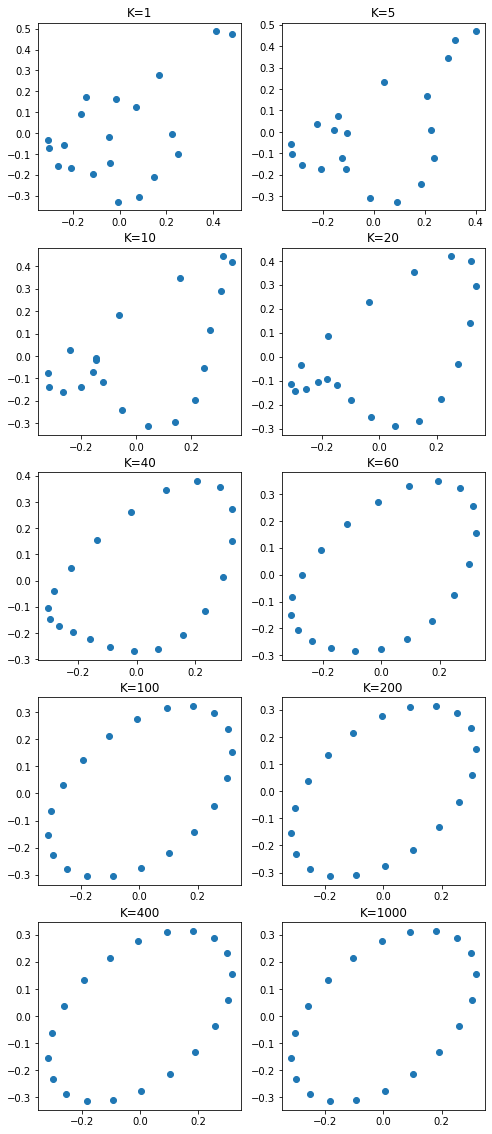

In [11]:
x_init = np.random.randn(20)
x_init[19]= -1*sum(x_init[0:19])
y_init = np.random.randn(20)
y_init[19]= -1*sum(y_init[0:19])
x,y = algo(np.copy(x_init),np.copy(y_init),1000,False)

### b)

Let's examine what happens to $x$ in iterations.
$$x^{(0)} = (x_1 x_2 ...   x_N)
$$ 
$$x^{(1)} = (\frac{x_1+x_2}{2L} \frac{x_2+x_3}{2L} ...   \frac{x_N+x_1}{2L})
$$ 

without loss of generality, I will assume all $x$ norms be $L$.

$$x^{(2)} = (\frac{x_1+2x_2+x_3}{4L^2} \frac{x_2+2x_3+x_4}{4L^2} ...  \frac{x_N+2x_1+x_2}{4L^2})
$$  

$$x^{(3)} = (\frac{x_1+3x_2+3x_3+x_4}{8L^3} \frac{x_2+3x_3+3x_4+x_5}{8L^3} ...  \frac{x_N+3x_1+3x_2+x_3}{8L^3})
$$

See that the $x_1...x_N$ is the initial indices of $x$ in all equations.  
Eventually, $x$ will have indices having linear combinations of initial $x$ indices with binomial coefficients. These binomial coefficients will keep on adding to each other in a circular fashion with the nature of algorithm. At some point, the set of values in $x$ will not change, however, the indices will circularly alternate. 

### c)

The $M$ matrix that represents the iterations of algoritm is:

$$ M = \begin{bmatrix}
1/2 & 1/2 & 0 & ... & 0\\
0 & 1/2 & 1/2 & ... & 0\\
... &...&...&...& ...\\
0& 0 &...&1/2&1/2 \\
1/2 &0&...&0&1/2 
\end{bmatrix}
$$

Given $a^k = ||M.x^{(k)}||$,

$$ x^{(k+1)} = \frac{1}{a^k}.Mx^{(k)}
$$

This also holds for $y$.

Given $b^k = ||M.y^{(k)}||$,

$$ y^{(k+1)} = \frac{1}{b^k}.My^{(k)}
$$

In [12]:
M = np.zeros((20,20))

for i in range(20):
    M[i][i]=0.5
  
    if i==19:
        M[i][0]=0.5
    else:
        M[i][i+1]=0.5

In [13]:
def modified_algo(x,y,K):
    for i in range(K):
        x=(M@x)/np.linalg.norm(M@x)
        y=(M@y)/np.linalg.norm(M@y)

    return x,y


In [14]:
x2,y2 = modified_algo(np.copy(x_init),np.copy(y_init),1000)
print("Norm of the difference between x result of first and second algo: "+str(np.linalg.norm(x2-x)))
print("Norm of the difference between y result of first and second algo: "+str(np.linalg.norm(y2-y)))

Norm of the difference between x result of first and second algo: 0.0
Norm of the difference between y result of first and second algo: 0.0


See that multiplying with $M$ gives same results.

### d)

Any $\lambda$ such that $|M-\lambda I|=0$ is an eigenvalue of $M$.   
Call $M_i$ as the matrix with same functionality with $M$ but works for arrays with size $i$.

We can compute the eigenvalues for $M_i$ by starting from 1 and capture a pattern.

$$|M_1-\lambda I|= 1/2-\lambda = 0, \lambda=1/2
$$
$$|M_2-\lambda I|= \lambda^2 -\lambda = 0, \lambda=0,1
$$
$$|M_3-\lambda I|= 0, \lambda=1, \frac{1+j\sqrt{3}}{4},\frac{1-j\sqrt{3}}{4}
$$

This pattern brings 

$$\lambda_n =\frac{1}{2}+\frac{e^{j2 \pi n /N}}{2}
$$

We can verify this by plotting through the unit circle.

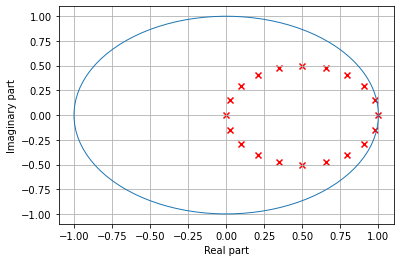

In [15]:
val, v = np.linalg.eig(M)
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), linewidth=1)
plt.scatter(val.real,val.imag,color='r',marker='x')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.grid()

If some $x_n$ and some $\lambda_n$ are eigenvector and eigenvalue of matrix $M$ respectfully, then the following must hold:

$$ M.x_n=\lambda_n .x$$
$$ (M-\lambda_n I)x_n=0$$

We obtained $\lambda_n$ before. Then design $M'=M-\lambda_n I$

$$ M' = \begin{bmatrix}
-\frac{e^{j2 \pi n /N}}{2} & 1/2 & 0 & ... & 0\\
0 & -\frac{e^{j2 \pi n /N}}{2} & 1/2 & ... & 0\\
... &...&...&...& ...\\
0& 0 &...&-\frac{e^{j2 \pi n /N}}{2}&1/2 \\
1/2 &0&...&0&-\frac{e^{j2 \pi n /N}}{2} 
\end{bmatrix}
$$

$$ M'.x_n = 0$$

The system can be shown as:

$$- e^{j2 \pi n /20}.x_{n,1} +  x_{n,2} = 0 $$
$$- e^{j2 \pi n /20}.x_{n,2} +  x_{n,3} = 0 $$
$$- e^{j2 \pi n /20}.x_{n,3} +  x_{n,4} = 0 $$
$$... $$
$$- e^{j2 \pi n /20}.x_{n,20} +  x_{n,1} = 0 $$

Then 

$$x_{n,2} = e^{j2 \pi n /20}.x_{n,1}$$

Plugging $x_{n,2}$ into second equation:

$$x_{n,3} = e^{j2 \pi 2.n /20}.x_{n,1}$$

Generalize:

$$x_{n,i} = e^{j2 \pi (i-1).n /20}.x_{n,1}$$

$$x_{n,20} = e^{j2 \pi 19.n /20}.x_{n,1}$$

$$x_{n,1} = e^{j2 \pi 20.n /20}.x_{n,1} $$

$$ 1= 1$$

Thus, $x_{n,1}$ is a free variable but for $x_n$ corresponding to $\lambda_n$, the following should hold:

$$x_n = k. \begin{bmatrix}
 1\\
 e^{j2 \pi (1).n /20}\\
 e^{j2 \pi (2).n /20}\\
..\\
 e^{j2 \pi (19).n /20}
\end{bmatrix}
$$


### e)

To show that eigenvectors construct an orthogonal basis, we can put eigenvectors in a matrix $V$ such that each column corresponds to an eigenvector. Than this matrix should be an orthogonal matrix. 

$$ V^H.V = k.I $$
$$ V^H.V - k.I = 0$$

$k$ is the scaling factor.

In [16]:
def construct(n): # prepare the eigenvectors
    x = np.array([np.exp(1j*(2*np.pi*n*i/20)) for i in range(0,20)])
    return x

V = np.matrix([construct(j) for j in range(1,21)])
V = V.H
print("Norm of difference: "+ str(np.linalg.norm(V.H@V-20*np.eye(20),ord=2)))  # k is 20 here


Norm of difference: 1.5865062768598426e-13


## Question 4

### a) 

$$g_n(c^{(n)}) = (c^{(n)}-a)^2+b = 0
$$
$c^{(n)}$ have two options: ${0,1}$. Then,

$$ (1-a)^2+b = 0
$$

$$a^2+b =0$$
Then $ a=1/2$ and $b=-1/4$. These constraints are necessary to keep $c^{(n)}$ binary.


### b) 

$$f_d(c) = \sum_{n=1}^{N}c^{(n)}.| {x_d}^{(n)}-\frac{\sum_{m=1}^{N}c^{(m)}x_d^{(m)} }{\sum_{m=1}^{N}c^{(m)}}|
+\sum_{n=1}^{N}(1-c^{(n)}).| {x_d}^{(n)}-\frac{\sum_{m=1}^{N}(1-c^{(m)})x_d^{(m)} }{\sum_{m=1}^{N}(1-c^{(m)})}|
$$

$$ ||f(c)||^2 = \sum_{d=1}^{D} f_d^2(c)
$$

$f_d(c)$ is a measure of distance among dth indices in a cluster. In each iteration, point $n$ is taken, and its dth index is compared with the average of dth indices in the same cluster. The differences are summed. Then this operation is conducted for all indices and summed again. If a point's index values are close to the average of that cluster, there is nothing to prevent us to think that the point belongs to the cluster.  

Since we want points resemble each other among themselves in a cluster, we want $f(c)$ to be minimized. $f(c)$ being minimized means points are seperated to clusters and the sum of differences between points and average of their clusters is minimized. This is our aim.


### c)





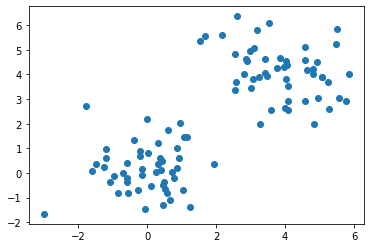

In [17]:
points = pd.read_csv("./data/Q4_points.csv")
xval = np.array(points['x'])
yval = np.array(points['y'])

plt.scatter(xval,yval)

### d)

## Question 5
Reference: https://ekamperi.github.io/mathematics/2020/11/01/principal-component-analysis-lagrange-multiplier.html
### a)

$$\sigma^2(a_1)= \frac{1}{N}.a_1^T.X^TX.a_1
$$

$$L_1(a_1,\lambda_1) = \sigma^2(a_1)+\lambda_1(1-a_1^Ta_1)
$$

To maximize $L_1$, we need to find stationary points.

$$\frac{\partial L_1}{\partial_{a_1}} =\frac{1}{N}. 2.a_1^T.(X^TX)-2.\lambda_1.a_1^T = 0
$$

$$\frac{\partial L_1}{\partial_{\lambda_1}} = a_1^T.a_1-1=0
$$

Then,

$$\frac{1}{N}.X^TX.a_1 = \lambda_1.a_1
$$

must hold.

Call $S=\frac{1}{N}.X^TX$. Then $a_1$ is an eigenvector of S and $\lambda_1$ is the corresponding eigenvalue.  




### b)

SVD of $X$ can be shown as:

$$ X = U.\Sigma.V^T
$$

As we now before, columns of $V$ consists of eigenvectors of $X^TX$. Since we know that $a_1$ is an eigenvector of $S$, $a_1$ appears to be one of the singular vectors of $X$ in SVD.(Scaled by N)

Now let's consider diagonalization of $S$.

$$ S = V.D.V^T$$ 
where $D$ is a diagonal matrix keeping eigenvalues of $S$ Therefore $\lambda_1$ is also in one of the diagonals of $D$.

Plug SVD of $X$ in $S$.

$$ S = \frac{V.\Sigma^T.U^T.U.\Sigma.V^T}{N} = \frac{V.\Sigma^2.V^T}{N} = V.D.V^T
$$

See that  $$D = \frac{\Sigma^2}{N}$$

Then $\sqrt{\lambda_1.N}$ shows up in $\Sigma$ in SVD of X.

Indeed, $\lambda_1$ is the largest eigenvalue of $S$ because,

$$ \sigma(a_1) = a_1^T.S.a_1 = a_1^T.\lambda_1.a_1 = \lambda_1.a_1^T.a_1 = \lambda_1
$$

Thus, optimal $\lambda_1$ should be the one that maximizes the variance, the largest eigenvalue. $a_1$ is the eigenvector corresponding to $\lambda_1$.



### c)


For $K=2$, we are going to think of an A matrix where its columns will be $a_1$ and $a_2$. Our constraint of $(A^TA-I) = 0$ will be still valid. Then $a_2$ and $a_1$ should be orthogonal to each other. We will derive a similar Lagrangian formula to $a_2$, but also add the constraint such that $a_2$ and $a_1$ are orthogonal to each other.  

$$L_2(a_2,\lambda_2) = \sigma^2(a_2)+\lambda_2(1-a_2^Ta_2)+\theta(a_2^Ta_1)
$$

$$\frac{\partial L_2}{\partial_{a_2}} =2.a_2^T.S-2.\lambda_2.a_2^T +\theta.a_1^T= 0
$$

Multiplying both sides with $a_1$:

$$\frac{\partial L_2}{\partial_{a_2}} = 2.a_2^T.S.a_1-2.\lambda_2.a_2^T.a_1 +\theta.a_1^T.a_1= 0
$$

$S.a_1 = \lambda_1.a_1$  

$$\frac{\partial L_2}{\partial_{a_2}} = 2.\lambda_1.a_2^T.a_1-2.\lambda_2.a_2^T.a_1 +\theta.a_1^T.a_1= 0
$$

$a_2^T.a_1 = 0$ and $a_1^T.a_1 = 1$ 

$$\frac{\partial L_2}{\partial_{a_2}} = \theta.1= 0
$$

Then $\theta = 0$.

$$\frac{\partial L_2}{\partial_{a_2}} =2.a_2^T.S-2.\lambda_2.a_2^T= 0
$$

$$\frac{\partial L_2}{\partial_{\lambda_2}} = a_2^T.a_2-1=0
$$



See that the optimality conditions are exactly same as in $a_1$. Then:

$$ S.a_2 = \lambda_2.a_2 $$  

Again, $a_2$ is an eigenvector of $S$ and $\lambda_2$ is the corresponding eigenvalue. Having known that $a_2$ and $a_1$ are orthogonal, to maximize the variance, $\lambda_2$ should be the second largest eigenvalue and $a_2$ be the corresponding eigenvector.  

For any $K=k$, $A$ will be the matrix having the columns consisting of eigenvectors of $S$ that corresponds to the $k$ largest eigenvalues of $S$. Then each $x_n$ will be projected to a $k$ dimensional subspace whose basis consists of eigenvectors of $S$. 

### d)

In [18]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces( )
D = faces['images']

In [19]:
X= []
for i in range(len(D)):
    face = D[i]
    adding = np.array([])
    for j in range(len(face)):
        adding = np.append(adding,face[j])

    X.append(adding)
X = np.array(X)

### e)

In [20]:
u,s,v = np.linalg.svd(X)
sigma = np.zeros(X.shape)
for i in range(len(s)):
    sigma[i,i]=s[i]


v[0:1,0:10]

array([[-0.0111939 , -0.01218334, -0.0133833 , -0.01457196, -0.01558919,
        -0.01653771, -0.01744525, -0.01817275, -0.01865553, -0.01898874]])

### f)



In [21]:
image = X[0]

S = X.T@X
S = S/400

A = v[0:3,:]

z = A@image

z

array([-41.21981517,  -0.76485904,  -2.13199801])

### g)

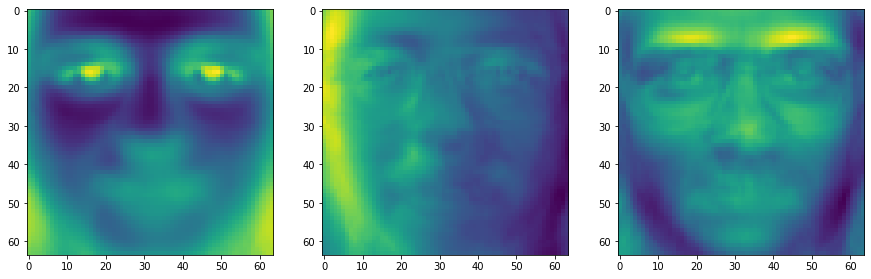

In [22]:
f,ax = plt.subplots(1,3,figsize=(15,5))
for i in range(3):
    im=v[i,:]
    im= im.reshape((64,64))
    ax[i].imshow(im)

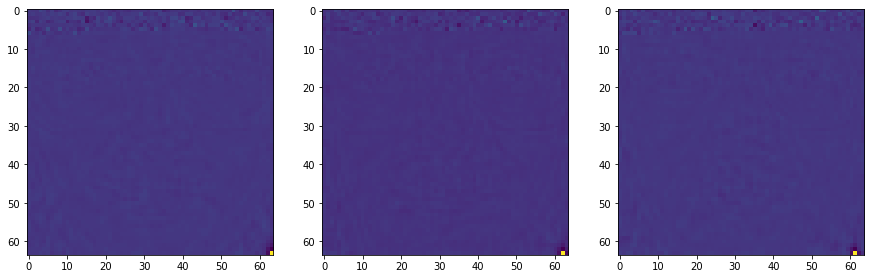

In [23]:
f,ax = plt.subplots(1,3,figsize=(15,5))
for i in range(3):
    im=v[4095-i,:]
    im= im.reshape((64,64))
    ax[i].imshow(im)

## Question 6


### a)

In [24]:
data = pd.read_csv("./data/Q6_bivariate.csv")

In [25]:
x = np.zeros(300)
x[0] = float(data.columns[0])
y = np.zeros(300)
y[0] = float(data.columns[1])
x[1:] = data.iloc[:,0].to_list()
y[1:] = data.iloc[:,1].to_list()

In [26]:
np.mean(y)

0.22854296169479985

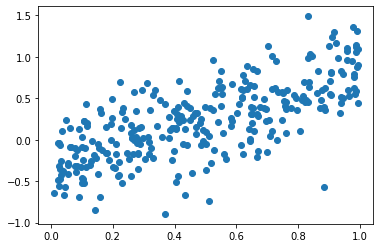

In [27]:
plt.scatter(x,y)

### b)  


Contruct a matrix $A$ to build a system for mapping $x$ to $\hat{y}$.

$$\hat{y_i} = \theta_1 +\theta_2.x_i$$

$A$ has first column of ones and second column of $x$. Then $A$ be:  

$$ A = 
\begin{bmatrix}
1 & x_1\\
... & ...\\
1 & x_n 
\end{bmatrix}
$$

$$ \theta = \begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix}$$

$$\hat{y} = A.\theta$$

We need to minimize the error. 

$$ min ||y-\hat{y}||^2 = ||y-A.\theta||^2$$

Optimal $\theta$ is:

$$\theta = {(A^T.A)}^{-1}.A^T.y
$$


Intercept:  -0.3074673400254892
Slope:  1.1051757371473054


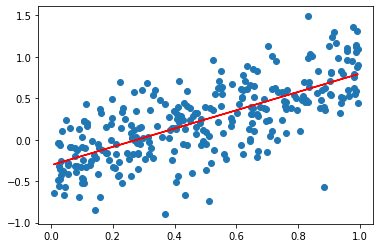

In [28]:
A = np.ones((300,2))

for i in range(300):
    A[i,1]= x[i]
    
theta = np.linalg.inv(A.T@A)@A.T@y

yhat = A@theta
plt.plot(x,yhat,color='r')
plt.scatter(x,y)
print("Intercept: ",theta[0])
print("Slope: ",theta[1])

### c)


Text(0.5, 1.0, 'Centered')

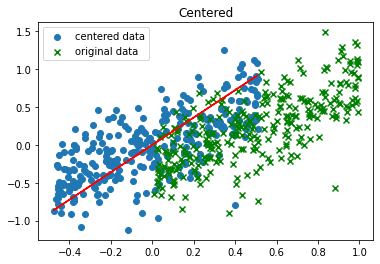

In [29]:
X = np.ones((300,2))
x_bar = np.mean(x)
y_bar = np.mean(y)
for i in range(300):
    X[i,0]=x[i]-x_bar
    X[i,1]=y[i]-y_bar

u,s,v = np.linalg.svd(X)

a1 = v[0:1,:]
slope = a1[0,1]/a1[0,0]
intersect = y_bar

yhat_center = slope*X[:,0:1]
plt.scatter(X[:,0:1],X[:,1:2],label="centered data")
plt.scatter(x,y,color='g',marker='x',label="original data")
plt.plot(X[:,0:1],yhat_center,color='r')
plt.legend(loc="upper left")
plt.title("Centered")

Intercept:  -0.649519873657276
Slope:  1.8104386020332195


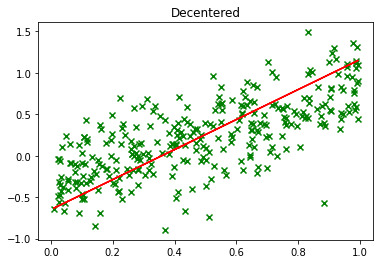

In [30]:
yhat_decenter = slope*x -(x_bar*slope-y_bar)  # line should pass from (x_bar,y_bar) 
plt.scatter(x,y,color='g',marker='x')
plt.plot(x,yhat_decenter,color='r')
plt.title("Decentered")

print("Intercept: ",-1*(x_bar*slope-y_bar))
print("Slope: ",slope)

### d)

In [31]:
from scipy import odr
def f(B,x) :
    return B[ 0 ]*x + B[ 1 ]

wds = [1,2,10,100]
a = []
b = []
for i in [1,2,10,100]:
    linearmodel = odr.Model(f)
    data = odr.Data( x=x, y=y, wd=i) 
    od_reg = odr.ODR(data ,linearmodel, beta0 =[ 0. ,0. ] )
    output = od_reg.run()
    slope,intercept = output.beta
    a.append(intercept)
    b.append(slope)


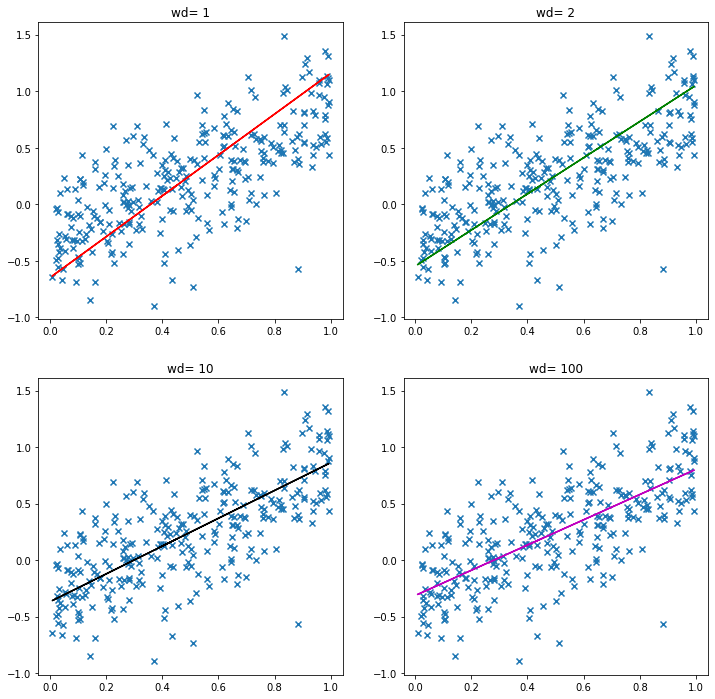

In [32]:
f, ax = plt.subplots(2,2,figsize=(12,12))
colors = ['r','g','k','m']
for i in range(4):
    j = i//2
    k = i%2
    ax[j,k].scatter(x,y,marker='x')
    ax[j,k].plot(x,a[i]+b[i]*x,color=colors[i])
    ax[j,k].set_title("wd= "+str(wds[i]))
    

In [33]:
print("Intercepts: ",a)
print("Slopes: ",b)

Intercepts:  [-0.6495026159249004, -0.548308391709953, -0.36893828961427283, -0.31372830282994985]
Slopes:  [1.8104030182933741, 1.601755234506745, 1.2319199454957985, 1.118084909343411]


### e)

**Comparison with OLS:**


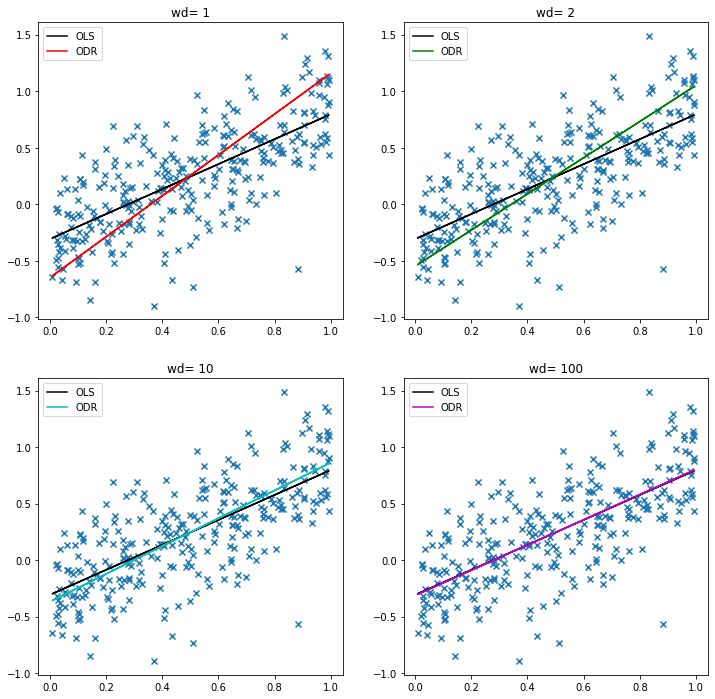

In [34]:
f, ax = plt.subplots(2,2,figsize=(12,12))
colors = ['r','g','c','m']
for i in range(4):
    j = i//2
    k = i%2
    ax[j,k].plot(x,yhat,color='k',label="OLS")
    ax[j,k].scatter(x,y,marker='x')
    ax[j,k].plot(x,a[i]+b[i]*x,color=colors[i],label='ODR')
    ax[j,k].set_title("wd= "+str(wds[i]))
    ax[j,k].legend(loc="upper left")

The aim of ODR is the following:

$$min \sum_{i=1}^{N} {(\hat{f}(u^{(i)};\theta)-y^{(i)})}^2  + w_d. \sum_{i=1}^{N} ||u^{(i)}-x^{(i)}||^2
$$

We see that as weight coefficient of the second term increases, the solution gets closer to OLS solution. This is normal since when $w_d$ increases, the second term is punished more and more and at some point, it is restricted to be zero. Then the problem boils down to OLS.

**Comparison with PCA:**

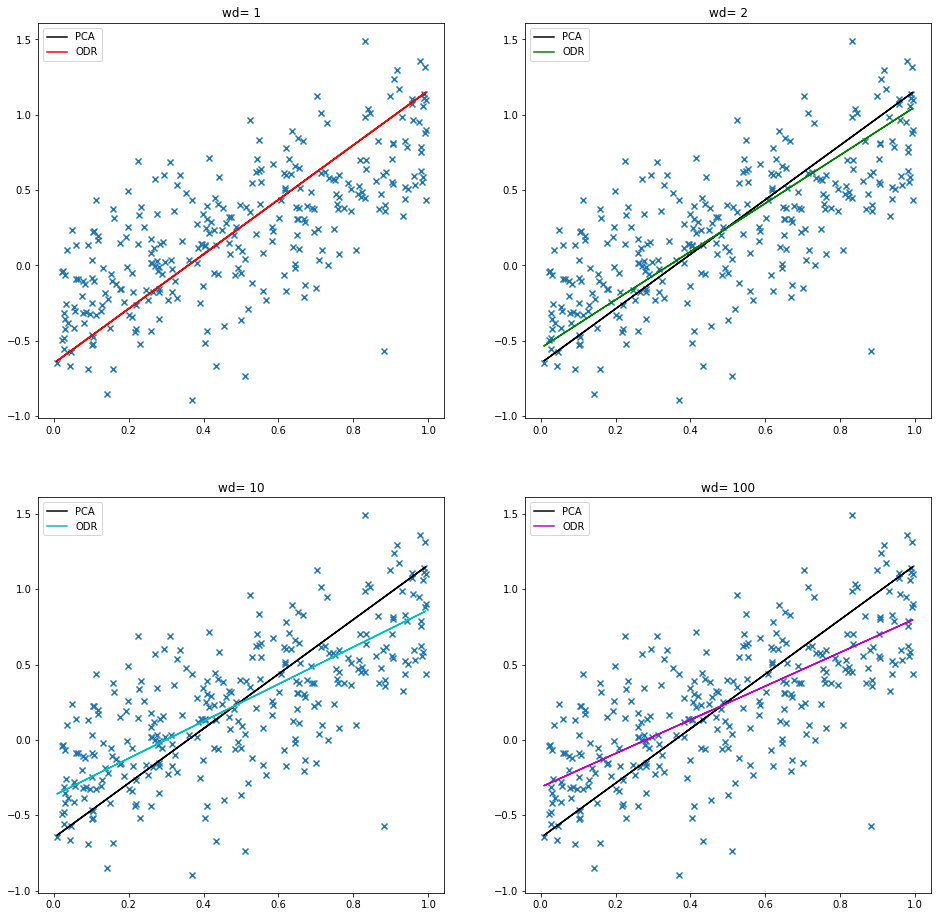

In [35]:
f, ax = plt.subplots(2,2,figsize=(16,16))
colors = ['r','g','c','m']
for i in range(4):
    j = i//2
    k = i%2
    ax[j,k].plot(x,yhat_decenter,color='k',label="PCA")
    ax[j,k].scatter(x,y,marker='x')
    ax[j,k].plot(x,a[i]+b[i]*x,color=colors[i],label='ODR')
    ax[j,k].set_title("wd= "+str(wds[i]))
    ax[j,k].legend(loc="upper left")

We see that PCA and ODR lines clearly coincide when wd=1. This is reasonable since the alternative formulation of PCA aims to minimize Eucledian distance between original points and projected points. When we put wd=1 into ODR cost function, it corresponds to the square of Eucledian distance anyway.